In [86]:
import numpy as np 
import nltk
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

In [87]:
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv('D:/Python/Restaurant_Sentiment_Analysis NLP Project/Restaurant_Reviews.tsv',sep='\t')

In [89]:
from nltk.stem import WordNetLemmatizer

In [90]:
import re
from nltk.corpus import stopwords
all_stopwords=stopwords.words('english')
ps=WordNetLemmatizer()
corpus=[]
for i in range(len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    review=[ps.lemmatize(word) for word in review if word not in set(all_stopwords)]
    corpus.append(' '.join(review))


In [91]:
df['processed_text']=corpus

In [92]:
df

,Review,Liked,processed_text
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great price
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor texture lacking
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall impressed would go back
998,"The whole experience was underwhelming, and I ...",0,whole experience underwhelming think go ninja ...


In [93]:
from wordcloud import WordCloud

In [94]:
wc=WordCloud()

In [95]:
positive=wc.generate(df[df['Liked']==1]['processed_text'].str.cat(sep=' '))

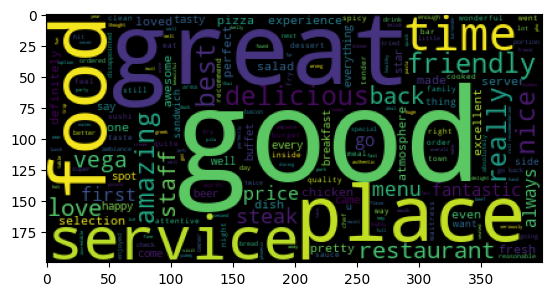

In [96]:
plt.imshow(positive)


In [97]:
negative=wc.generate(df[df['Liked']==0]['processed_text'].str.cat(sep=' '))

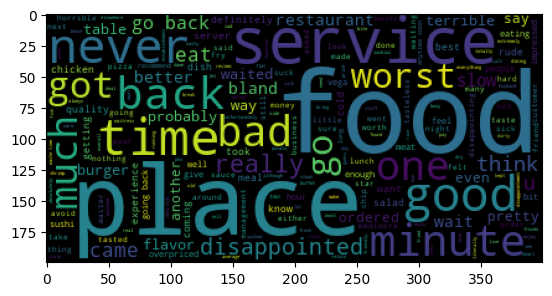

In [98]:
plt.imshow(negative)

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
cv=CountVectorizer(max_features=1500)

In [101]:
X=cv.fit_transform(corpus).toarray()

In [102]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [103]:
X.shape

(1000, 1500)

In [104]:
y=df['Liked']

In [105]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [108]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [109]:
from sklearn.naive_bayes import GaussianNB

In [110]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.68
0.6492537313432836
0.8365384615384616
0.7310924369747899


In [111]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.755
0.8160919540229885
0.6826923076923077
0.743455497382199


In [112]:
import pickle

# Save the trained Logistic Regression model
with open("model.pkl", "wb") as model_file:
    pickle.dump(lr, model_file)
